## OBBIETTIVO
##### Dimostrare che il comportamento sociale (eventi frequentati, tempo passato da solo, post pubblicati...) varia in modo significativo tra introversi ed estroversi, e che certi pattern sociali possono predire la personalità di un individuo.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### ESPLORAZIONE E PULIZZIA DEL DATASET

In [75]:
df = pd.read_csv('personality_dataset.csv')

In [76]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [78]:
df = df.drop(columns=['Stage_fear'])

In [79]:
# Encoding variabili binarie
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})

# Se ci sono valori mancanti
df = df.dropna()


In [80]:
df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,6,7,0,14,5,1
1,2,8,6,0,7,8,1
2,1,9,4,0,9,3,1
3,8,0,0,1,9,3,0
4,5,3,0,0,2,6,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Time_spent_Alone           5000 non-null   int64
 1   Social_event_attendance    5000 non-null   int64
 2   Going_outside              5000 non-null   int64
 3   Drained_after_socializing  5000 non-null   int64
 4   Friends_circle_size        5000 non-null   int64
 5   Post_frequency             5000 non-null   int64
 6   Personality                5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [82]:
# Controlliamo che veramente non ci siano valori null stampando il conteggio 
# di tutti i valori nulli per ogni colonna
df.isnull().sum()


Time_spent_Alone             0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

#### Una volta finite le operazioni di pulizia del dataset siamo pronti a visualizzare i dati mediante grafici, con l'obbiettivo di poter osservare se realmente i comportamenti sociali variano in modo significativo tra **introversi** e **estroversi**.                                                                                                               Quello che ci aspettiamo di osservare è che gli introversi tenderanno a passare più tempo da soli ed avere meno interazioni sociali, mentre per gli estroversi ci aspettiamo un comportamento sociale opposto.

<h2><span style="color: red;">Distribuzione del tempo passato da soli (Introversi vs Estroversi)</span><h2>


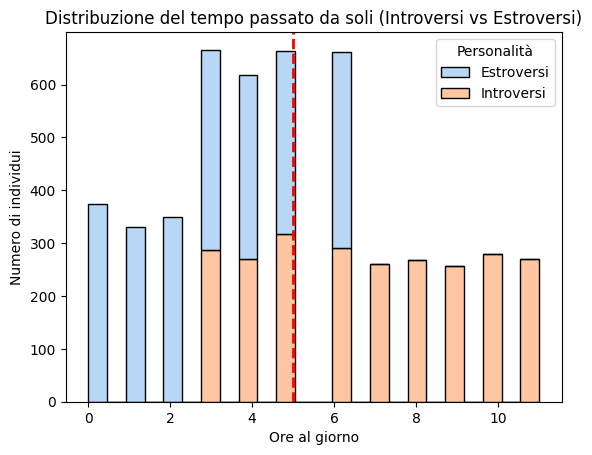

In [83]:
#Calcolo della mediana 
mediana = df['Time_spent_Alone'].median()

sns.histplot(
    data=df.assign(Personalità=df['Personality'].map({0: 'Introversi', 1: 'Estroversi'})),
    x='Time_spent_Alone',
    multiple='stack',
    hue='Personalità',
    palette='pastel'
)
# Linea verticale rossa per la mediana
plt.axvline(x=mediana, color='red', linestyle='--', linewidth=2)

plt.title('Distribuzione del tempo passato da soli (Introversi vs Estroversi)')
plt.xlabel('Ore al giorno')
plt.ylabel('Numero di individui')
plt.show()

#### <span style="color: blue;">**Drescrizzione Grafico**</span>
##### Questo grafico mostra la distribuzione degli elementi presenti nella colonna Time_spent_Alone ovvero le ore trascorse da soli per ciascuna personalità (Introversi ed Estroversi). Questo grafico ci permette già di osservare un certo pattern sociale per il quale abbiamo una netta distizione di comportamenti tra le persone Introverse la cui distribuzione si concentra su fascie orarie maggiori, e le persone estroverse la cui distribuzione invece si concentra su fascie orarie inferiori.

#### <span style="color: red;">**Considerazioni:**</span> Possiamo dedurre quindi che le persone introverse tendono a passare più tempo da sole rispetto alle persone estroverse.

<h2><span style="color: red;">Distribuzione della partecipazione ad eventi sociali (Introversi vs Estroversi)</span><h2>


##### Proseguiamo seguendo l'onda delle considerazioni precedenti, ma passando ad osservare un comportamento più attivo, ovvero il numero di eventi sociali frequentati di recente.

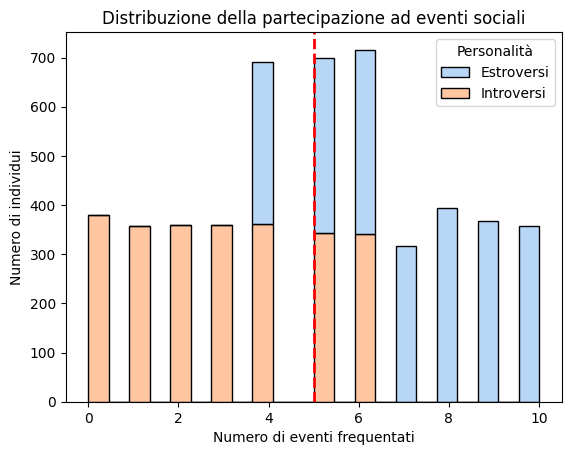

In [84]:
mediana = df['Social_event_attendance'].median()

sns.histplot(
    data=df.assign(Personalità=df['Personality'].map({0: 'Introversi', 1: 'Estroversi'})),
    x='Social_event_attendance',
    hue='Personalità',
    multiple='stack',
    palette='pastel',
)

plt.axvline(x=mediana, color='red', linestyle='--', linewidth=2)

plt.title('Distribuzione della partecipazione ad eventi sociali')
plt.xlabel('Numero di eventi frequentati')
plt.ylabel('Numero di individui')
plt.show()

#### <span style="color: Blue;">**Descrizione Grafico**</span>
#### Questo grafico mostra la distribuzione degli elementi presenti nella colonna Social_event_attendance, ovvero il numero di eventi sociali partecipati di recente per chiascuna personalità (Introversi ed Estroversi).                     Anche in questo caso possiamo notare un certo patter che da una netta distizione tra Introversi e Estroveri, ma opposta a quello precedente, infatti in questo caso abbiamo che la distribuzione si concentra su fascie valoriali maggiori per gli estroversi, e in fasce valoriali minori per gli introversi.
#### <span style="color: red;">**Considerazioni:**</span> Possiamo dedurre quindi che le persone estroverse tendono a partecipare a un numero maggiore di eventi sociali ripetto agli introversi, deduzzione coerente con quello che ci potevamo aspettare date le considerazioni precedenti.


<h2 style="color:red">Distribuzione Persone: Tempo da soli vs Eventi sociali.</h2>

##### Abbiamo osservato come le variabili [Time_spent_Alone] e [Social_event_attendance] prese singolarmente ci permettono di individuare un pattern visivo che conferma la correlazione comportamentale attesa tra personalità e interazione sociale, questa correlazione diventa ancora più evidente dal momento in cui queste due variabili vengono valutate insieme, come nel grafico qui sotto.

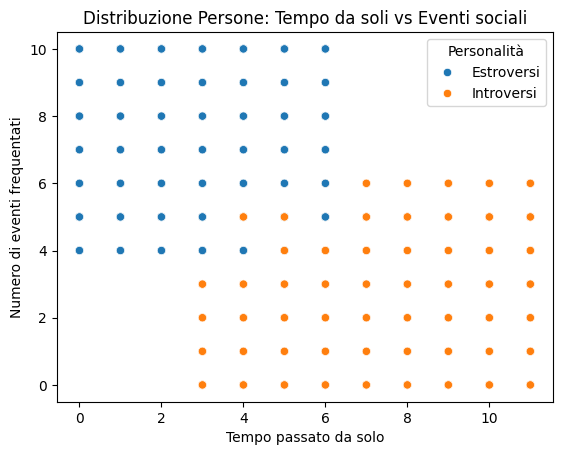

In [85]:

sns.scatterplot( 
    data=df.assign(Personalità=df['Personality'].map({0: 'Introversi', 1: 'Estroversi'})), 
    x="Time_spent_Alone", 
    y="Social_event_attendance", 
    hue='Personalità',
    legend=True
)
plt.title("Distribuzione Persone: Tempo da soli vs Eventi sociali")
plt.xlabel("Tempo passato da solo")
plt.ylabel("Numero di eventi frequentati")
plt.show()


#### <span style="color: Blue;">**Descrizione Grafico**</span>
##### Questo grafico mostra la relazione tra le due variabili chiave: <b>ore passate da soli</b> e <b>numero di eventi sociali frequentati</b> differenziata per tipologia di personalità (Introversi e Estroversi).                                Quindi ogni punto rappresenta un individuo e rivela il suo comportamento sociale: lungo l'asse X si nota il livello di isolamento, mentre sull'asse Y si osserva la partecipazione sociale.
#### <span style="color: red;">**Considerazione:**</span> È evidente una distinzione tra i gruppi: **gli introversi** tendono ad accumularsi nella zona con più tempo da soli e meno eventi, mentre **gli estroversi** si collocano soprattutto nella regione con meno isolamento e più partecipazione sociale.                                                               Questo pattern visivo conferma la correlazione comportamentale attesa tra personalità e interazione sociale.

<h2><span style="color: red;">Stanchezza dopo interazione sociale per tipo di personalità</span><h2>

#### Questa distinzione netta dei comportamenti sociali tra introveri e estroversi viene giustificata dalla scienza psicologica, che afferma che questa distinzione trova spieganzione nella diversa modalità di gestione dell'energia mentale. La distinzione tra introversi ed estroversi nella gestione dell’energia mentale è stata introdotta da **Carl Gustav Jung** nel 1920, e da allora è stata approfondita da numerosi studi e psicologi contemporanei.Ecco cosa sappiamo:

##### - Gli **introversi** tendono a ricaricarsi stando da soli, poiché sono più sensibili agli stimoli esterni e si affaticano più facilmente in ambienti sociali intensi.                                                                  
##### - Gli **estroversi**, al contrario, si energizzano attraverso l’interazione sociale, grazie a un sistema dopaminergico più attivo che li rende più reattivi alle ricompense esterne.

#### Troviamo una conferma di questa teoria attraverso la visualizzazione dei dati del grafico qui sotto:

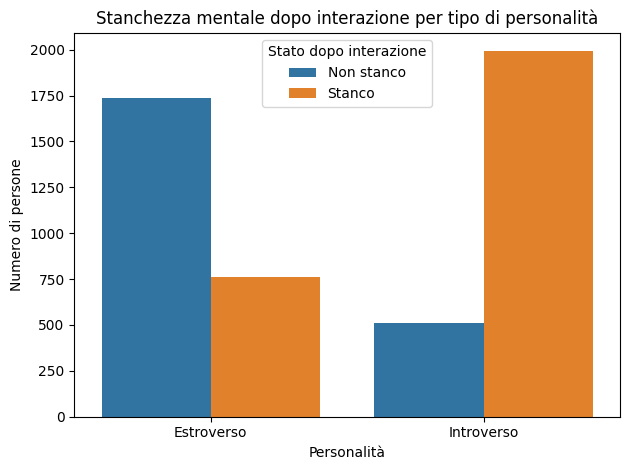

In [86]:

sns.countplot(
    data=df,
    x=df['Personality'].map({0: 'Introverso', 1: 'Estroverso'}),
    hue=df['Drained_after_socializing'].map({0: 'Non stanco', 1: 'Stanco'})
)

plt.title("Stanchezza mentale dopo interazione per tipo di personalità")
plt.xlabel("Personalità")
plt.ylabel("Numero di persone")
plt.legend(title='Stato dopo interazione')
plt.tight_layout()
plt.show()


#### <span style="color: Blue;">**Descrizione Grafico**</span>
##### In questo grafico mostriamo per ogni tipologia di persona (Introversi-Estroversi) il conteggio degli individui che si sentono mentalmente esausti dopo l'interazione sociale e quelle che non provono questa stanchezza, sfruttando i dati presenti nella colonna [Drained_after_socializing].

#### <span style="color: red;">**Considerazione:**</span> La visualizzazione evidenzia una tendenza interessante: gli introversi presentano una maggiore incidenza di stanchezza post-socializzazione rispetto agli estroversi, il che è coerente con la letteratura psicologica sulla gestione dell’energia mentale

<h2><span style="color: red;">Altre Distribuzioni</span><h2>


##### Possiamo distinguere una netta differenza dei comportamenti sociali tra introversi e estroversi anche osservando le distribuzioni delle altre colonne a nostra disposizione, ovvero le colonne [Friends_circle_size] e [Going_outside]

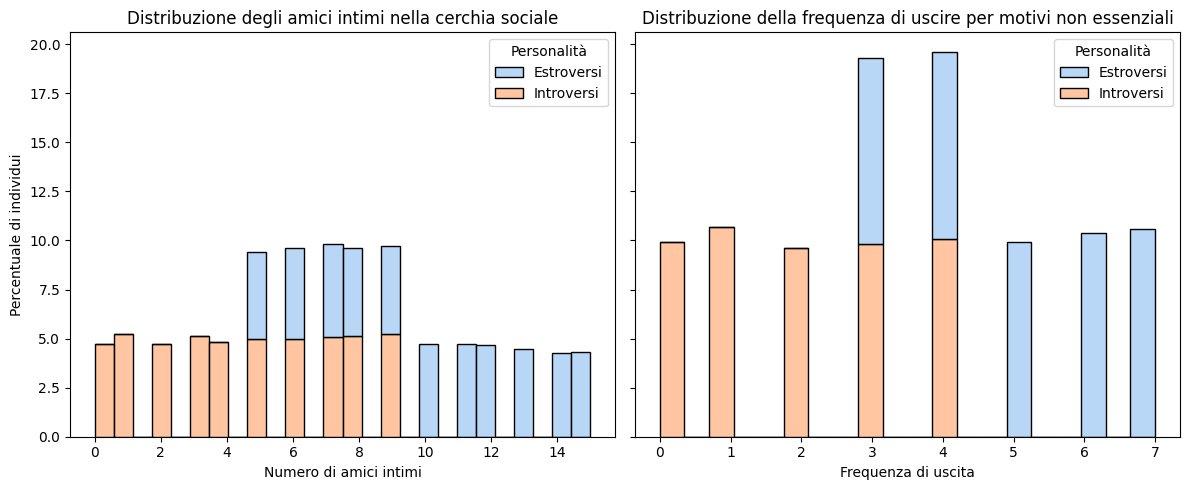

In [87]:
# Mappa temporanea per le etichette leggibili
df_viz = df.assign(Personalità=df['Personality'].map({0: 'Introversi', 1: 'Estroversi'}))

# Crea due sottografici (affiancati)
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Istogramma 1: Friends_circle_size
sns.histplot(
    data=df_viz,
    x='Friends_circle_size',
    hue='Personalità',
    multiple='stack',
    palette='pastel',
    stat='percent',
    ax=axs[0]
)

# Istogramma 2: Going_outside
sns.histplot(
    data=df_viz,
    x='Going_outside',
    hue='Personalità',
    multiple='stack',
    palette='pastel',
    stat='percent',
    ax=axs[1]
)
axs[0].set_title('Distribuzione degli amici intimi nella cerchia sociale')
axs[0].set_xlabel('Numero di amici intimi')
axs[0].set_ylabel('Percentuale di individui')

axs[1].set_title('Distribuzione della frequenza di uscire per motivi non essenziali')
axs[1].set_xlabel('Frequenza di uscita')

plt.tight_layout()
plt.show()


#### <span style="color: Blue;">**Descrizione Grafici**</span>
#### Questi due grafici mostrano rispettivamente la distribuzione del numero di amici intimi all'interno della cerchia sociale dell'individuo, e la distribuzione della frequenza di uscita per motivi non essenziali, entrambi i grafici ci permettono di osservare un certo pattern sociale per il quele abbiamo una netta distizione di comportamenti tra **Estroversi** le cui distribuzioni si concentrano su fascie valoriali maggiori, e **Introversi** le cui distribuzioni invece si concentra su fascie valoriali inferiori.
#### <span style="color: red;">**Considerazione:**</span> Anche in questo caso abbiamo confermata la correlazione comportamentale attesa tra personalità e interazione sociale, infatti possiamo dedurre che gli **Estroversi** tendono ad avere un numero di amici intimi all'interno della loro cerchia sociale maggiore, e una maggiore frequenza di uscita per motivi non essenziali, mentre per gli **Introversi** abbiamo un comportamento sociale opposto. Esattamente come ci aspettavamo.


<h2><span style="color: red;">Frequenza di pubblicazione online: un’estroversione virtuale?</span><h2>

#### Una nota interessante può essere fatta, prendendo in considera la colonna del dataset [Post_Frequency], ovvero la frequenza della pubblicazione sui social media. Date le considerazioni fatte fino ad ora e i comportamenti sociali osservati tra introversi e estroversi, dato che quest'ultimi tendo ad avere una maggiore interazione sociale e a passare molto meno tempo da soli, ci aspettiamo di avere una distribuzioni degli elementi per la quale sarà possibile osservare una maggior attivita sui social da parte degli introversi rispetto agli estroversi, ma sarà davvero così ?

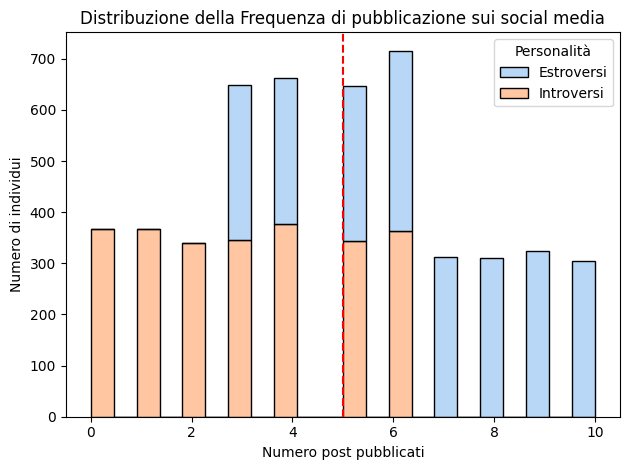

In [88]:
mediana = df['Post_frequency'].median()

sns.histplot(
    data=df.assign(Personalità=df['Personality'].map({0: 'Introversi', 1: 'Estroversi'})),
    x='Post_frequency',
    hue='Personalità',
    multiple='stack',
    palette='pastel',
)

plt.axvline( x=mediana, color='red', linestyle='--')

plt.title('Distribuzione della Frequenza di pubblicazione sui social media')
plt.xlabel('Numero post pubblicati')
plt.ylabel('Numero di individui')
plt.tight_layout()
plt.show()

#### <span style="color: blue;">**Drescrizzione Grafico**</span>
##### Questo grafico mostra la distribuzione degli elementi presenti nella colonna, Post_frequency ovvero la frequenza della pubblicazione sui social media per chiascuna personalità (Introversi ed Estroversi). Possiamo osservare un certo pattern sociale per il quale anche in questo caso abbiamo una netta distizione di comportamenti tra gli **Introversi** la cui distribuzione si concentra su fascie valoriali minori, e gli **estroversi** la cui distribuzione invece si concentra su fascie valoriali maggiori, osserviamo quindi un comportamento inverso a quello previsto inizialemente.

#### <span style="color: red;">**Considerazioni:**</span> A prima vista potrebbe sorprendere il fatto che gli estroversi pubblichino più frequentemente sui social rispetto agli introversi, nonostante trascorrano meno tempo da soli e partecipino attivamente a eventi sociali. Tuttavia, questo comportamento è coerente con la loro modalità di gestione dell’energia mentale: gli estroversi si ricaricano attraverso l’interazione e la stimolazione sociale — anche quella digitale. Al contrario, per molti introversi, i social media sono percepiti come un’estensione delle interazioni reali, e quindi anch’essi possono risultare faticosi. Di conseguenza, anche la produzione di contenuti online può essere vissuta come un’attività drenante, anziché ricaricante. 


#### <span style="color: green;">**Primo Obbiettivo**</span>
#### Tramite la visualizzazione dei dati del nostro dataset mediante grafici siamo riusci a dimostrare la veridicità del primo punto del nostro obbiettivo, ovvero dimostrare che il comportamento sociale varia in modo significativo tra introversi ed estroversi. Adesso possiamo concentraci sul secondo punto del nostro obbiettivo, ovvero il dimostrare che certi pattern sociali possono predire la personalità di un individuo, attraverso dei modelli di predizzione.

<h2><span style="color: red;">Realizzazione del modello di regressione logica</span><h2>

#### Per le nostre previsioni utilizzeremo un modello di regressione logica, nello specifico inizieremo ad adrestare i modelli prendendo in considerazione singolarmente le nostre variabili [Time_spent_Alone] e [Social_event_attendance], interrogando i modelli sia sulle previsioni che sulle probabilità delle previsioni, e osservando il grado di accuratezza, per poi provare ad adestrarre il modello prendondo in condiderazioni più variabili contemporaneamente (quelle con correlazione maggiore con la personalità) e vedere di quanto si migliori l'accuratezza delle previsioni.

/Users/salvatorepersico/Desktop/Big_Data_Progetto_Main/venvProgetto/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


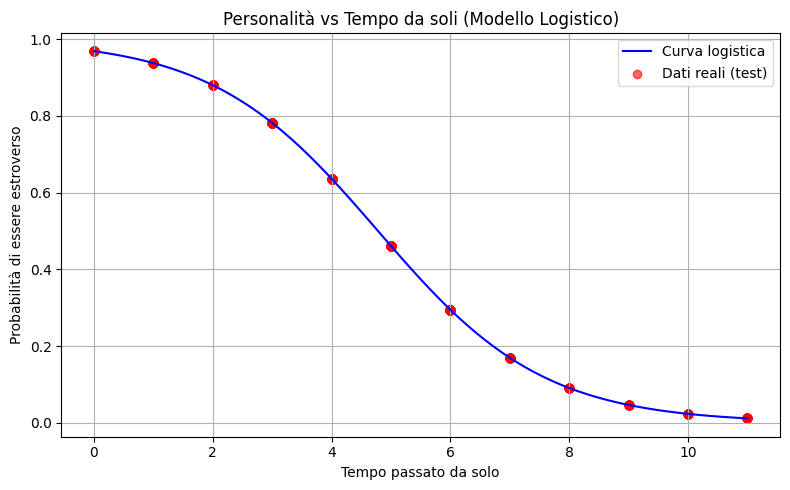

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Time_spent_Alone']]       
y = df['Personality'] # 0 = introverso, 1 = estroverso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modello logistico
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsione probabilità su test set
y_prob_pred = model.predict_proba(X_test)[:, 1]   # Probabilità di essere estroverso

# Previsione su test set
y_pred = model.predict(X_test)

# Visualizzazione: scatter dei dati + curva logistica continua
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_prob = model.predict_proba(X_range)[:, 1]

plt.figure(figsize=(8,5))
plt.plot(X_range, y_range_prob, color='blue', label='Curva logistica')
plt.scatter(X_test, y_prob_pred, color='red', alpha=0.6, label='Dati reali (test)')
plt.xlabel("Tempo passato da solo")
plt.ylabel("Probabilità di essere estroverso")
plt.title("Personalità vs Tempo da soli (Modello Logistico)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### <span style="color: blue;">**Drescrizzione Grafico**</span>

#### Il grafico rappresenta il risultato di un modello di regressione logistica applicato per prevedere la probabilità che un individuo sia estroverso, in funzione del tempo trascorso da solo. La linea blu mostra la curva logistica teorica generata dal modello, mentre i punti rossi corrispondono alle probabilità stimate per ciascun individuo nel test set.

#### <span style="color: red;">**Considerazioni:**</span> Gli individui che trascorrono meno tempo da soli hanno una probabilità maggiore di essere classificati come estroversi, confermando il modello comportamentale emerso dalle analisi precedenti.


In [90]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.754


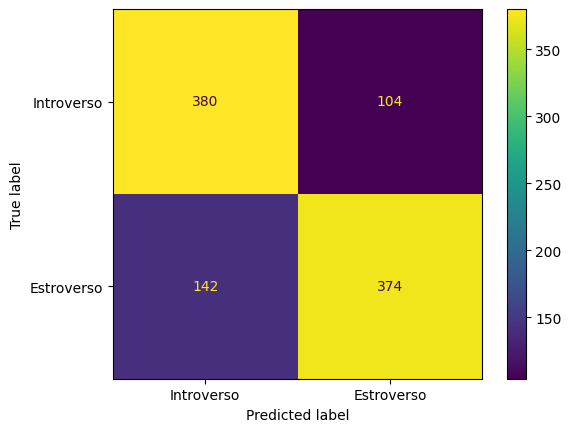

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introverso', 'Estroverso'])
disp.plot();

/Users/salvatorepersico/Desktop/Big_Data_Progetto_Main/venvProgetto/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


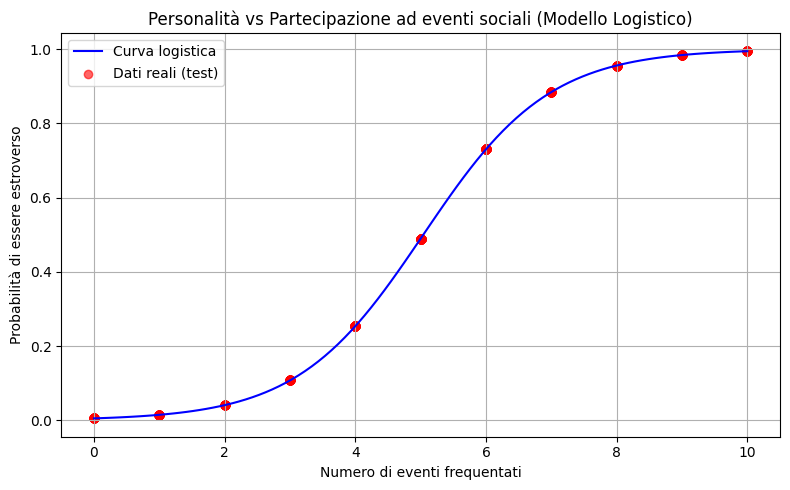

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Social_event_attendance']]       
y = df['Personality'] # 0 = introverso, 1 = estroverso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modello logistico
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsione probabilità su test set
y_prob_pred = model.predict_proba(X_test)[:, 1]   # Probabilità di essere estroverso

# Previsione su test set
y_pred = model.predict(X_test)

# Visualizzazione: scatter dei dati + curva logistica continua
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_prob = model.predict_proba(X_range)[:, 1]

plt.figure(figsize=(8,5))
plt.plot(X_range, y_range_prob, color='blue', label='Curva logistica')
plt.scatter(X_test, y_prob_pred, color='red', alpha=0.6, label='Dati reali (test)')
plt.xlabel("Numero di eventi frequentati")
plt.ylabel("Probabilità di essere estroverso")
plt.title("Personalità vs Partecipazione ad eventi sociali (Modello Logistico)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### <span style="color: blue;">**Drescrizzione Grafico**</span>

#### Il grafico rappresenta il risultato di un modello di regressione logistica applicato per prevedere la probabilità che un individuo sia estroverso, in funzione del numero di eventi sociali frequentati. La linea blu mostra la curva logistica teorica generata dal modello, mentre i punti rossi corrispondono alle probabilità stimate per ciascun individuo nel test set.

#### <span style="color: red;">**Considerazioni:**</span> Gli individui che frequentano un numero maggiore di eventi sociali hanno una probabilità maggiore di essere classificati come estroversi, confermando il modello comportamentale emerso dalle analisi precedenti.

In [93]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.794


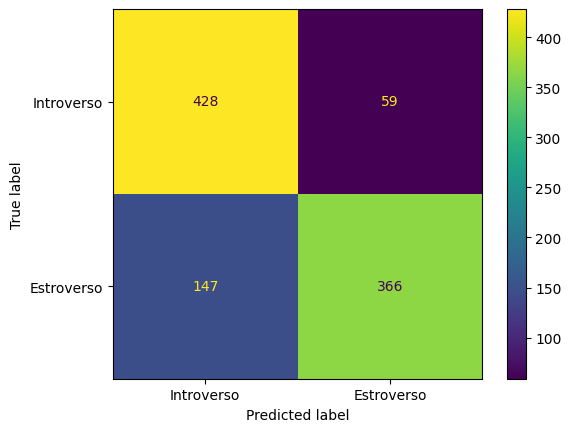

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introverso', 'Estroverso'])
disp.plot()

#### Sebbene i modelli adestrati con le singole variabili abbiano ottenuto risultati interessati con un buon grado di accuratizza, adesso proviamo a migliorare le previsioni del modollo prendendo in considerazioni più variabili contemporaneamente, nello specifico andiamo a prendere le variabili con l'indice di correlazione maggiore con la personalità.
#### Per fare ciò andiamo a visualizzare la matrice di correlazione:

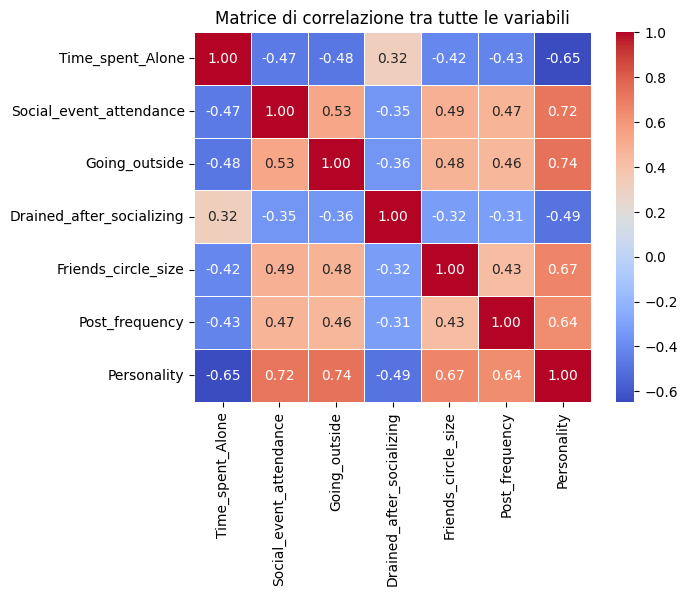

In [95]:
# Calcolo della matrice di correlazione
correlazioni = df.corr()

# Heatmap
plt.figure()
sns.heatmap(correlazioni, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice di correlazione tra tutte le variabili')
plt.show()

#### Dalla matrice di correllazione possiamo osservare che oltre le colonne che abbiamo già prenso in considerazione per i precedenti modelli [Time_spent_Alone] e    [Social_event_attendance], le colonne con indice di correlazione maggiore con la colonna [Personality] sono le colonne [Going_outside], [Friends_circle_size], e [Post_frequency]. Quindi per adrestare il nostro modello utilizzeremo tutte e 5 queste colonne.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
X = df[['Social_event_attendance', 'Time_spent_Alone', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]  
y = df['Personality'] 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
y_pred = model.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [102]:
print("\nModel Evaluation")
print("-----------------")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared Score: {r2:.3f}")


Model Evaluation
-----------------
Mean Squared Error: 0.010
R-squared Score: 0.960


In [103]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.99


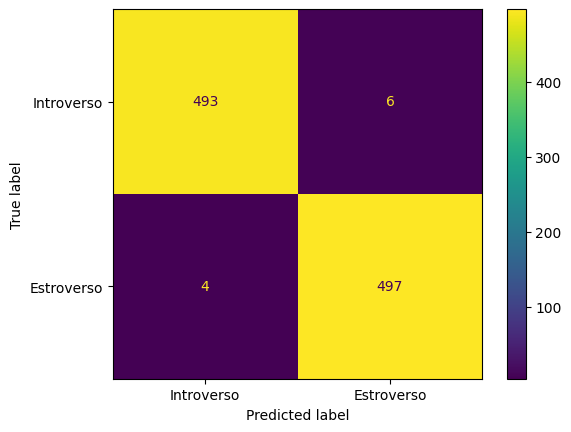

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introverso', 'Estroverso'])
disp.plot()

#### <span style="color: red;">**Considerazioni:**</span> Possiamo osservare come utilizzando tutte le colonne con indici di corellazione maggiore con la colonna [Persanality], si riesca a migliorare notevolmente il grado di accuratezza del modello, riuscendo così a dimostrare che certi pattern sociali possono predire la personalità di un individuo

<h2><span style="color: red;">K-means clustering per individuare cluster di persone con comportamenti simili</span><h2>

<Axes: xlabel='Time_spent_Alone', ylabel='Social_event_attendance'>

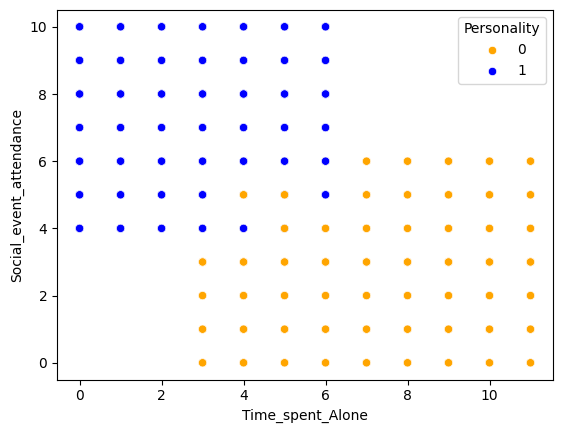

In [105]:
sns.scatterplot(data=df, x='Time_spent_Alone', y='Social_event_attendance', hue='Personality', palette=['orange','blue'])

<Axes: xlabel='Going_outside', ylabel='Friends_circle_size'>

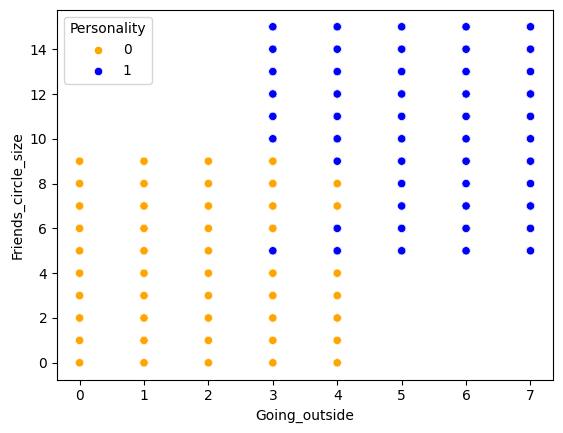

In [106]:
sns.scatterplot(data=df, x='Going_outside', y='Friends_circle_size', hue='Personality', palette=['orange','blue'])

#### **Implementazione K-means clustering**

In [107]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(df.drop(columns=['Personality']))

In [108]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42) #k-means con 2 clusters

In [109]:
df['cluster_pred'] = kmeans.fit_predict(X_scaled)

<Axes: xlabel='Time_spent_Alone', ylabel='Social_event_attendance'>

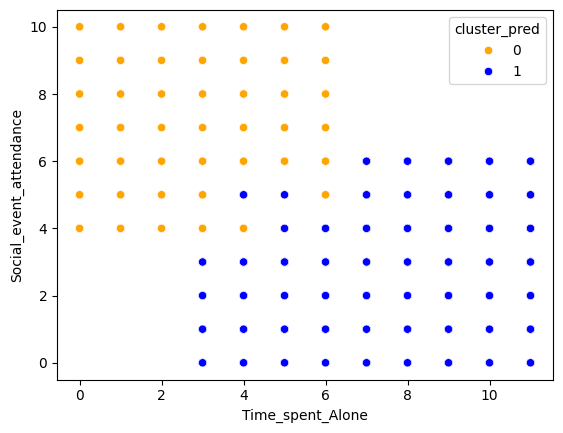

In [110]:
sns.scatterplot(data=df, x='Time_spent_Alone', y='Social_event_attendance', hue='cluster_pred', palette=['orange','blue'])

#### **Interpretazione**
##### **Cluster 0:** Rappresenta le persone estroverse che passano meno tempo da sole e partecipano ad un numero alto di eventi sociali.
##### **Cluster 1:** Rappresenta le persone introverse che passano molte ore da soli e partecipano a un numero basso di eventi sociali.

<Axes: xlabel='Going_outside', ylabel='Friends_circle_size'>

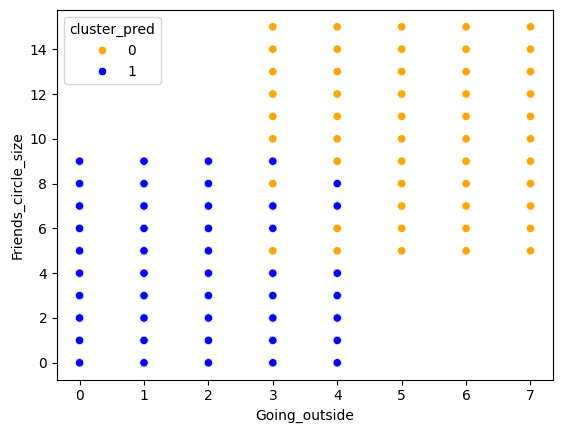

In [111]:
sns.scatterplot(data=df, x='Going_outside', y='Friends_circle_size', hue='cluster_pred', palette=['orange','blue'])

#### **Interpretazione**

##### **Cluster 0:** Rappresenta le persone estroverse che hanno un numero di amici intimi e una frequenza di uscire per motivi non essenziali più alti.
##### **Cluster 1:** Rappresenta le persone introverse che hanno un numero di amici intimi e una frequenza di uscire per motivi non essenziali più bassi.

#### <span style="color: red;">**Considerazioni:**</span> I cluster ottenuti sembrano riflettere **modelli di comportamento compatibili con la distinzione tra personalità introversa ed estroversa**. Nonostante il modello non avesse accesso diretto alla variabile "Personality", è riuscito a separare naturalmente gli individui in gruppi coerenti, suggerendo che le abitudini sociali e relazionali sono fortemente informative per identificare il profilo psicologico.

#### Elbow method

In [112]:
wcss = []

for i in range (1, 10):
    kmeans= KMeans(i, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
wcss

[30000.0,
 17037.914844448307,
 15624.61287471106,
 14274.683444623895,
 12173.722245212637,
 11334.619179470494,
 10942.041297628613,
 10512.575530587712,
 10084.998003771381]

Text(0, 0.5, 'Within-cluster Sum of Squares')

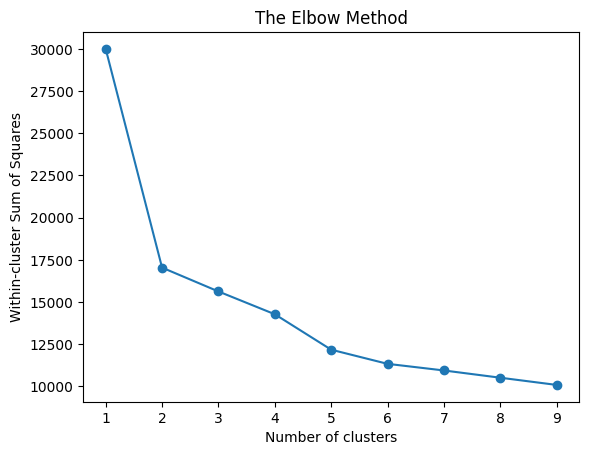

In [113]:
plt.plot(range(1, 10), wcss, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

#### <span style="color: green;">**Secondo Obbiettivo**</span>
#### Tramite l'utilizzo di modelli predittivi c'è stato possibile dimostrare la veridicità del secondo punto del nostro obbiettivo, ovvero che certi pattern sociali possono predire la personalità di un individuo.

#### <span style="color: green;">**Conclusioni**</span>
#### L’analisi ha evidenziato come i comportamenti sociali — dal tempo trascorso da soli alla frequenza delle interazioni, dalla pubblicazione sui social alla risposta emotiva dopo l’interazione, siano fortemente correlati con il profilo di personalità. Gli approcci statistici, cosi come i modelli predittivi applicati hanno permesso di cogliere pattern coerenti con la letteratura psicologica, dimostrando che anche dati quantitativi semplici possono riflettere dinamiche profonde come la gestione dell’energia mentale. 